In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.utils import load_img, img_to_array

In [30]:
MODEL_NAME = "mobilenet"
IMAGE_FOLDER = "images"
TARGET_SIZE = (224, 224)
TOP_K = 3

In [31]:
def load_model_by_name(name):
    name = name.lower()
    if name == "mobilenet":
        model = MobileNetV2(weights="imagenet")
        preprocess_fn = mobilenet_preprocess
    elif name == "resnet":
        model = ResNet50(weights="imagenet")
        preprocess_fn = resnet_preprocess
    else:
        raise ValueError("Unknown model name. Use 'mobilenet' or 'resnet'.")
    return model, preprocess_fn

In [32]:
def prepare_image(path, target_size=(224,224)):
    img_pil = load_img(path, target_size=target_size)
    img_arr = img_to_array(img_pil)
    return img_arr, img_pil

In [33]:
def classify_image(img_path, model, preprocess_fn):
    
    processed_img, display_img = prepare_image(img_path)
    if processed_img.ndim == 2:
        processed_img = np.stack([processed_img]*3, axis=-1)
    if processed_img.shape[-1] == 4:
        processed_img = processed_img[..., :3]
    x = np.expand_dims(processed_img, axis=0).astype("float32")  # shape (1, H, W, C)
    x = preprocess_fn(x)
    preds = model.predict(x)

    decoded_preds = decode_predictions(preds, top=TOP_K)[0]

    plt.imshow(display_img)
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    print("Top 3 Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_preds):
        print(f"{i+1}. {label} ({score:.2f})")


Classifying: images/lion.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


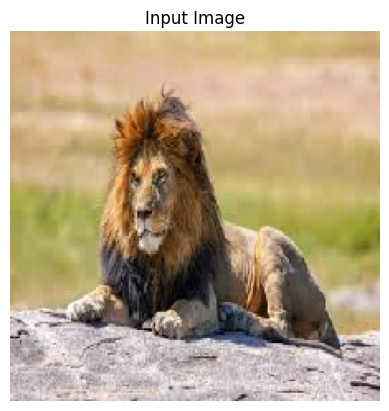

Top 3 Predictions:
1. lion (0.96)
2. dhole (0.00)
3. brown_bear (0.00)

Classifying: images/chair.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


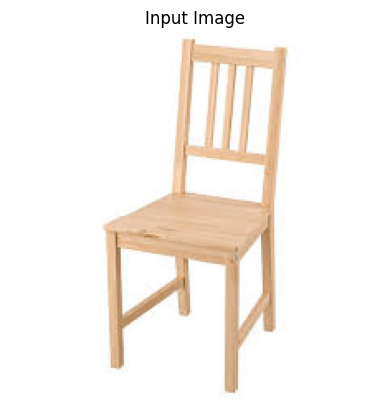

Top 3 Predictions:
1. folding_chair (0.76)
2. rocking_chair (0.02)
3. desk (0.01)

Classifying: images/fox.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


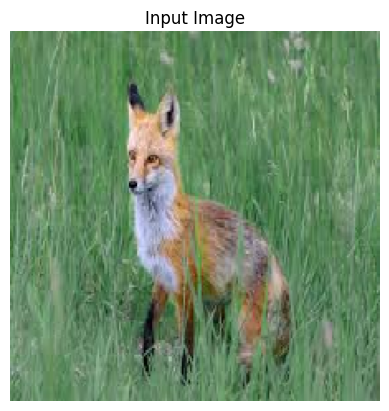

Top 3 Predictions:
1. red_fox (0.76)
2. kit_fox (0.16)
3. grey_fox (0.03)

Classifying: images/horse.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


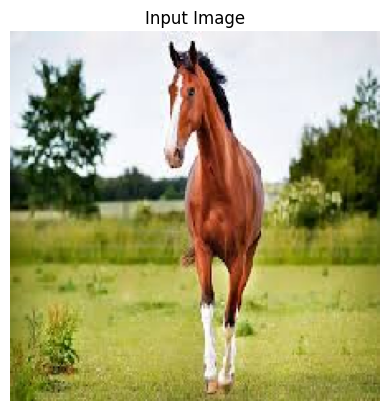

Top 3 Predictions:
1. sorrel (0.87)
2. hartebeest (0.01)
3. Saluki (0.00)


In [ ]:
test_images = ["images/lion.jpeg", "images/chair.jpeg", "images/fox.jpeg", "images/horse.jpeg"]

model, preprocess_fn = load_model_by_name('mobilenet')

for img_path in test_images:
    print("\nClassifying:", img_path)
    classify_image(img_path, model, preprocess_fn)